In [1]:
import pandas as pd
from sqlalchemy import create_engine, text
import cred_pg as c

# None = unbegrenzt
pd.set_option("display.max_rows", 50)
pd.set_option("display.max_columns", None)

In [2]:
engine = create_engine(
    f'postgresql://{c.pg_userid}:{c.pg_password}@{c.pg_host}/{c.pg_db}', 
    connect_args = {
        'options': '-c search_path=${user},ugeobln,ugm,uinsta,umisc,umobility,usozmed,public', 
        'keepalives_idle': 120
    },
    pool_size=1, 
    max_overflow=0,
    execution_options={ 'isolation_level': 'AUTOCOMMIT' }
)

In [3]:
with engine.connect() as con:
    sql = "select rolname  from pg_roles where rolname like 'u%'"
    df = pd.read_sql_query(text(sql), con)
df

,rolname
0,u580854
1,u580873
2,u580974
3,ucla
4,ugeobln
5,ugm
6,uinsta
7,umisc
8,umobility
9,usozmed


In [4]:
with engine.connect() as con:
    sql = """
    select schemaname, tablename 
    from pg_tables 
    where schemaname like 'u%'
    order by schemaname, tablename
    """
    df = pd.read_sql_query(text(sql), con)
df

,schemaname,tablename
0,ucla,Grade
1,ucla,TextModule
2,ucla,UserData
3,ucla,food
4,ucla,gm
...,...,...
65,usozmed,person_studyat_university
66,usozmed,person_workat_company
67,usozmed,tag
68,usozmed,tagclass


In [5]:
with engine.connect() as con:
    sql = """
    with
      spy as (
        select extract(year from sales_month) as jahr
        from retail_sales
      )
    select jahr, count(*) as anzahl
    from spy
    where jahr >= 2010
    group by jahr
    order by jahr
    """
    df = pd.read_sql_query(text(sql), con)
df.jahr = df.jahr.astype('int32')
df.set_index('jahr', inplace = True)
df

,anzahl
jahr,
2010,780
2011,780
2012,780
2013,780
2014,780
2015,780
2016,780
2017,780
2018,780


<AxesSubplot: xlabel='jahr'>

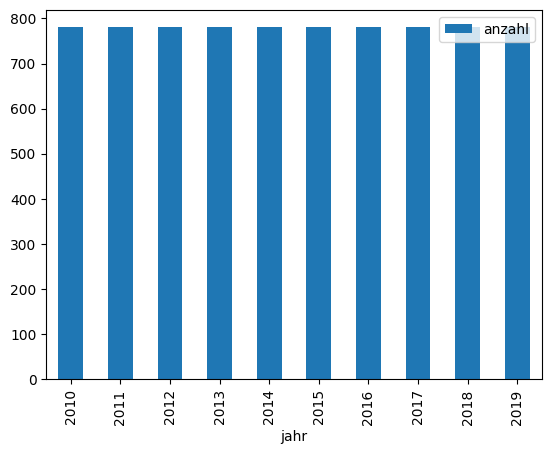

In [6]:
df.plot.bar()